In [27]:
import pandas as pd
import seaborn as sns

In [28]:
df=pd.read_csv('diabetes.csv')

In [29]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
# input
x=df.drop('Outcome', axis=1)

# output
y=df['Outcome']

<Axes: xlabel='Outcome', ylabel='count'>

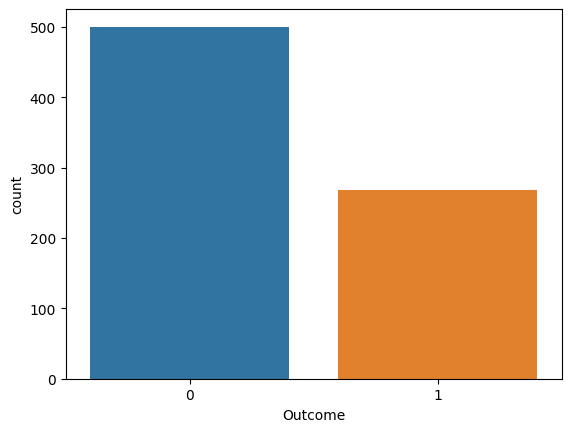

In [31]:
sns.countplot(x=y)

In [32]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scales=scaler.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y,random_state=0, test_size=0.25)

In [34]:
x.shape

(768, 8)

In [35]:
# Initializing and training a KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [37]:
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy score:  0.7552083333333334
Precision score:  0.631578947368421
Recall score:  0.5806451612903226
F1 score:  0.6050420168067226


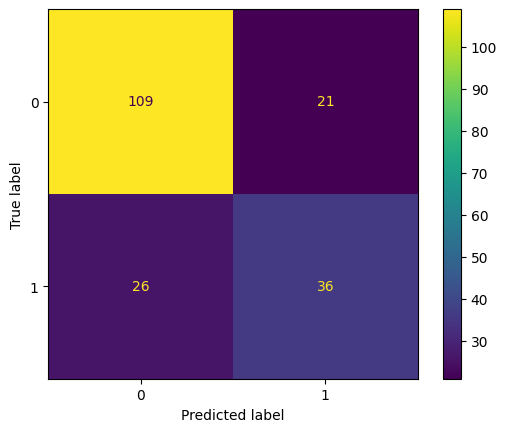

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [39]:
print(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose())

              precision    recall  f1-score     support
0              0.807407  0.838462  0.822642  130.000000
1              0.631579  0.580645  0.605042   62.000000
accuracy       0.755208  0.755208  0.755208    0.755208
macro avg      0.719493  0.709553  0.713842  192.000000
weighted avg   0.750629  0.755208  0.752375  192.000000
